In [1]:
import numpy as np
import matplotlib.pylab as plt
import random as rn
import time
from scipy.spatial import ConvexHull
from matplotlib.patches import Rectangle
from matplotlib.path import Path
from mpl_toolkits.mplot3d import Axes3D
import shapely.geometry as geometry
import shapely.ops as so
from Dynamic import DynamicMap
from Camera import Camera
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from scipy.spatial import KDTree
import json

In [22]:
# Import Result from 0.1 - 150 sec
result01 = {'0': {'compTimeSuccess': [0, 0, 0], 'compTime': [0.1178361701965332, 0.1181885313987732, 0.4212415051460266], 'pathTime': [0, 0, 0], 'pathDist': [0, 0, 0], 'successRate': [0.0, 0.0, 0.0]}, '1': {'compTimeSuccess': [0, 0, 0], 'compTime': [1.0190333461761474, 1.0521679973602296, 1.3732995438575744], 'pathTime': [0, 0, 0], 'pathDist': [0, 0, 0], 'successRate': [0.0, 0.0, 0.0]}, '2': {'compTimeSuccess': [0, 0, 0], 'compTime': [10.030511243343353, 10.30009658575058, 10.663982429504394], 'pathTime': [0, 0, 0], 'pathDist': [0, 0, 0], 'successRate': [0.0, 0.0, 0.0]}, '3': {'compTimeSuccess': [64.2988437016805, 0, 75.51509226452221], 'compTime': [97.88679946184158, 100.31551004171371, 97.90607877016068], 'pathTime': [-59.99343370052973, 0, 154.64824686882739], 'pathDist': [63.12250057961336, 0, 68.82685857811538], 'successRate': [0.06, 0.0, 0.11]}, '4': {'compTimeSuccess': [73.8717473745346, 84.42363187670708, 104.79576394191155], 'compTime': [141.45976094007491, 145.0115349149704, 134.9141983985901], 'pathTime': [-57.2381464668942, 103.1538519326105, 129.1461963529057], 'pathDist': [62.22104097788204, 55.633798989796105, 67.65536340558641], 'successRate': [0.12, 0.08, 0.41]}}
result01Key = list(result01.keys())
print(result01Key)

['0', '1', '2', '3', '4']


In [16]:
# Import Result from 200 sec
with open('2DComparison_Result_200.json') as json_file:
    result200 = json.load(json_file)
result200Key = list(result200['0'].keys())

In [14]:
# Import Result from 250 sec
with open('2DComparison_Result_250.json') as json_file:
    result250 = json.load(json_file)
result250Key = list(result250['0'].keys())

In [17]:
# Import Result from 300 sec
with open('2DComparison_Result_300.json') as json_file:
    result300 = json.load(json_file)
result300Key = list(result300['0'].keys())

In [18]:
# Import Result from 350 sec
with open('2DComparison_Result_350.json') as json_file:
    result350 = json.load(json_file)
result350Key = list(result350['0'].keys())

In [19]:
# Import Result from 400 sec
with open('2DComparison_Result_400.json') as json_file:
    result400 = json.load(json_file)
result400Key = list(result400['0'].keys())

In [20]:
# Import Result from 500 sec
with open('2DComparison_Result_500.json') as json_file:
    result500 = json.load(json_file)
result500Key = list(result500['0'].keys())

In [27]:
reseultVec = [result200, result250, result300, result350, result400, result500]

In [31]:
computationTimeLimit_List = [0.1, 1, 10, 100, 150, 200, 250, 300, 350, 400, 500]

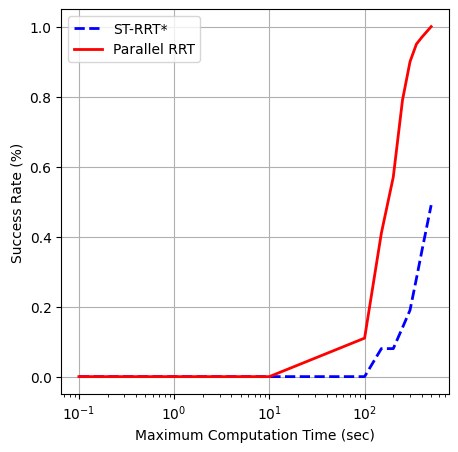

In [88]:
# Plot Success Rate vs CompTimeLimit
successRate_RRTstar_Result = []
successRate_STRRT_Result = []
successRate_RRTP_Result = []
for ii in range(len(result01Key)):
    result01_ii = result01[str(ii)]
    successRate_RRTstar_Result.append(result01_ii[result500Key[4]][0])
    successRate_STRRT_Result.append(result01_ii[result500Key[4]][1])
    successRate_RRTP_Result.append(result01_ii[result500Key[4]][2])
for ii in range(len(reseultVec)):
    successRate_RRTstar_Result.append(reseultVec[ii]['0'][result500Key[4]][0])
    successRate_STRRT_Result.append(reseultVec[ii]['0'][result500Key[4]][1])
    successRate_RRTP_Result.append(reseultVec[ii]['0'][result500Key[4]][2])

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.subplot(1,1,1)
# plt.plot(computationTimeLimit_List, successRate_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, successRate_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, successRate_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Success Rate (%)')
# plt.savefig('2DSim02_SuccessRate_log.png')
plt.savefig('2DSim02_SuccessRate_log_2comparison.png')

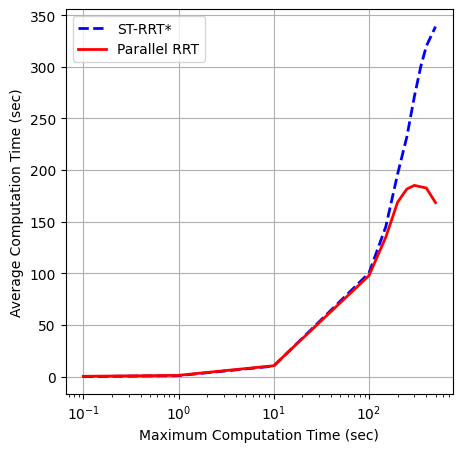

In [95]:
# Plot Average Computation Time vs CompTimeLimit
compTime_RRTstar_Result = []
compTime_STRRT_Result = []
compTime_RRTP_Result = []

currKey = result500Key[1]
for ii in range(len(result01Key)):
    result01_ii = result01[str(ii)]
    compTime_RRTstar_Result.append(result01_ii[currKey][0])
    compTime_STRRT_Result.append(result01_ii[currKey][1])
    compTime_RRTP_Result.append(result01_ii[currKey][2])


for ii in range(len(reseultVec)):
    compTime_RRTstar_Result.append(reseultVec[ii]['0'][currKey][0])
    compTime_STRRT_Result.append(reseultVec[ii]['0'][currKey][1])
    compTime_RRTP_Result.append(reseultVec[ii]['0'][currKey][2])

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.subplot(1,1,1)
# plt.plot(computationTimeLimit_List, compTime_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, compTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, compTime_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
# plt.savefig('2DSim02_ComputatoinTime.png')
# plt.savefig('2DSim02_ComputatoinTime_log_2comparison.png')

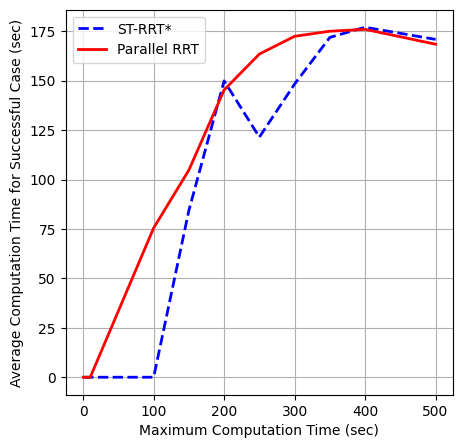

In [98]:
# Plot Average Successful Computation Time vs CompTimeLimit
compTimeSuccess_RRTstar_Result = []
compTimeSuccess_STRRT_Result = []
compTimeSuccess_RRTP_Result = []

currKey = result500Key[0]
for ii in range(len(result01Key)):
    result01_ii = result01[str(ii)]
    compTimeSuccess_RRTstar_Result.append(result01_ii[currKey][0])
    compTimeSuccess_STRRT_Result.append(result01_ii[currKey][1])
    compTimeSuccess_RRTP_Result.append(result01_ii[currKey][2])


for ii in range(len(reseultVec)):
    compTimeSuccess_RRTstar_Result.append(reseultVec[ii]['0'][currKey][0])
    compTimeSuccess_STRRT_Result.append(reseultVec[ii]['0'][currKey][1])
    compTimeSuccess_RRTP_Result.append(reseultVec[ii]['0'][currKey][2])

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.subplot(1,1,1)
# plt.plot(computationTimeLimit_List, compTimeSuccess_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, compTimeSuccess_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, compTimeSuccess_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
# ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time for Successful Case (sec)')
# plt.savefig('2DSim02_ComputatoinTimeSuccess.png')
# plt.savefig('2DSim02_ComputatoinTimeSuccess_2comparison.png')

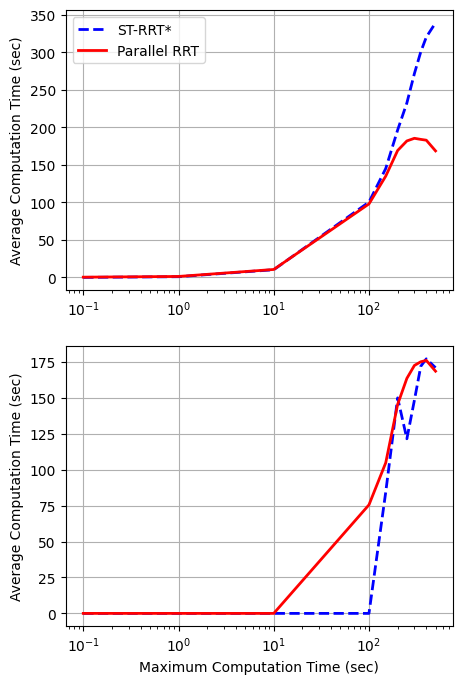

In [101]:
fig = plt.figure(figsize=(5, 8), dpi=100)
ax = plt.subplot(2,1,1)
# plt.plot(computationTimeLimit_List, compTime_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, compTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, compTime_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
# plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
ax.set_xscale('log')
plt.grid()
plt.legend()
ax = plt.subplot(2,1,2)
# plt.plot(computationTimeLimit_List, compTimeSuccess_RRTstar_Result, '--g', linewidth = 2)
plt.plot(computationTimeLimit_List, compTimeSuccess_STRRT_Result, '--b', linewidth = 2)
plt.plot(computationTimeLimit_List, compTimeSuccess_RRTP_Result, '-r', linewidth = 2)
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
ax.set_xscale('log')
plt.grid()
# plt.savefig('2DSim02_ComputatoinTimeComparison1.png')
# plt.savefig('2DSim02_ComputatoinTimeComparison1_log_2comparison.png')

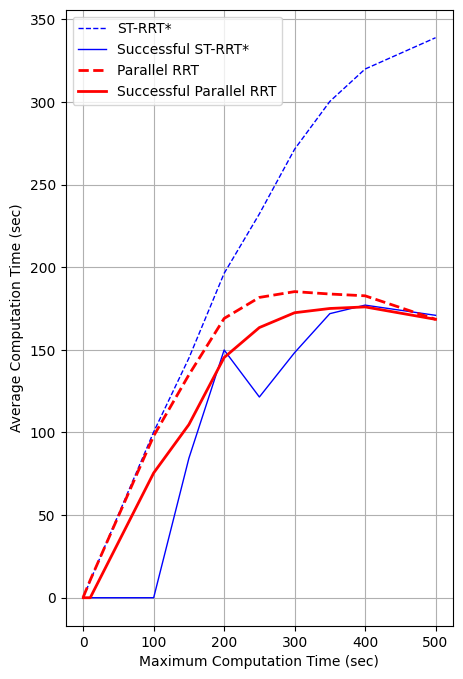

In [107]:
fig = plt.figure(figsize=(5, 8), dpi=100)
ax = plt.subplot(1,1,1)
linewidth_compTime = 1
linewidth_compTimeSucc = 1

# plt.plot(computationTimeLimit_List, compTime_RRTstar_Result, '--g', label='RRT*', linewidth = linewidth_compTime)
# plt.plot(computationTimeLimit_List, compTimeSuccess_RRTstar_Result, '-g', label='Successful RRT*', linewidth = linewidth_compTimeSucc)
plt.plot(computationTimeLimit_List, compTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = linewidth_compTime)
plt.plot(computationTimeLimit_List, compTimeSuccess_STRRT_Result, '-b', label='Successful ST-RRT*', linewidth = linewidth_compTimeSucc)
plt.plot(computationTimeLimit_List, compTime_RRTP_Result, '--r', label='Parallel RRT', linewidth = 2)
plt.plot(computationTimeLimit_List, compTimeSuccess_RRTP_Result, '-r', label='Successful Parallel RRT', linewidth = 2)
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
# ax.set_xscale('log')
plt.legend()
plt.grid()
# plt.savefig('2DSim02_ComputatoinTimeComparison2_log.png')
plt.savefig('2DSim02_ComputatoinTimeComparison1_2comparison.png')

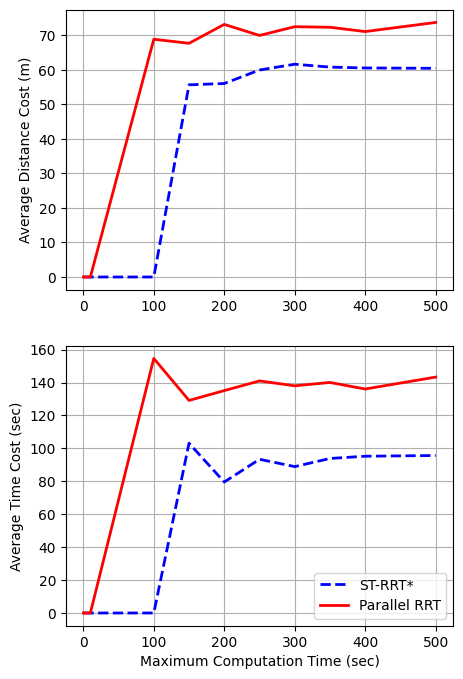

In [113]:
# Plot Distance Cost vs CompTimeLimit
pathDist_RRTstar_Result = []
pathDist_STRRT_Result = []
pathDist_RRTP_Result = []

currKey = result500Key[3]
for ii in range(len(result01Key)):
    result01_ii = result01[str(ii)]
    pathDist_RRTstar_Result.append(result01_ii[currKey][0])
    pathDist_STRRT_Result.append(result01_ii[currKey][1])
    pathDist_RRTP_Result.append(result01_ii[currKey][2])


for ii in range(len(reseultVec)):
    pathDist_RRTstar_Result.append(reseultVec[ii]['0'][currKey][0])
    pathDist_STRRT_Result.append(reseultVec[ii]['0'][currKey][1])
    pathDist_RRTP_Result.append(reseultVec[ii]['0'][currKey][2])

# Plot Distance Cost vs CompTimeLimit
pathTime_RRTstar_Result = []
pathTime_STRRT_Result = []
pathTime_RRTP_Result = []

currKey = result500Key[2]
for ii in range(len(result01Key)):
    result01_ii = result01[str(ii)]
    pathTime_RRTstar_Result.append(result01_ii[currKey][0])
    pathTime_STRRT_Result.append(result01_ii[currKey][1])
    pathTime_RRTP_Result.append(result01_ii[currKey][2])

for ii in range(len(reseultVec)):
    pathTime_RRTstar_Result.append(reseultVec[ii]['0'][currKey][0])
    pathTime_STRRT_Result.append(reseultVec[ii]['0'][currKey][1])
    pathTime_RRTP_Result.append(reseultVec[ii]['0'][currKey][2])


fig = plt.figure(figsize=(5, 8), dpi=100)
ax = plt.subplot(2,1,1)
# plt.plot(computationTimeLimit_List, pathDist_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, pathDist_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, pathDist_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
# plt.legend()
plt.grid()
# ax.set_xscale('log')
plt.ylabel('Average Distance Cost (m)')
ax = plt.subplot(2,1,2)
# plt.plot(computationTimeLimit_List, np.abs(pathTime_RRTstar_Result), '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, pathTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List, pathTime_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
# ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Time Cost (sec)')
# plt.savefig('2DSim02_Cost.png')
plt.savefig('2DSim02_2DSim02_Cost_2comparison.png')